## Importing Modules

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter

from sklearn.model_selection import train_test_split
import os,sys
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import sklearn.preprocessing as pp

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix


## EDA

In [89]:
df = pd.read_csv('Employee Satisfaction Index.csv')
print(df.head())
print(df.shape)
print(df.size)

   Unnamed: 0    emp_id  age        Dept location education  \
0           0    HR8270   28          HR   Suburb        PG   
1           1  TECH1860   50  Technology   Suburb        PG   
2           2  TECH6390   43  Technology   Suburb        UG   
3           3   SAL6191   44       Sales     City        PG   
4           4    HR6734   33          HR     City        UG   

     recruitment_type  job_level  rating  onsite  awards  certifications  \
0            Referral          5       2       0       1               0   
1             Walk-in          3       5       1       2               1   
2            Referral          4       1       0       2               0   
3           On-Campus          2       3       1       0               0   
4  Recruitment Agency          2       1       0       5               0   

   salary  satisfied  
0   86750          1  
1   42419          0  
2   65715          0  
3   29805          1  
4   29805          1  
(500, 14)
7000


In [90]:
df.drop(['Unnamed: 0','emp_id'],axis=1,inplace=True)
df.head()

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [91]:
df.shape

(500, 12)

In [92]:
df.size

6000

In [93]:
df.duplicated().sum()

0

In [94]:
df.shape

(500, 12)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               500 non-null    int64 
 1   Dept              500 non-null    object
 2   location          500 non-null    object
 3   education         500 non-null    object
 4   recruitment_type  500 non-null    object
 5   job_level         500 non-null    int64 
 6   rating            500 non-null    int64 
 7   onsite            500 non-null    int64 
 8   awards            500 non-null    int64 
 9   certifications    500 non-null    int64 
 10  salary            500 non-null    int64 
 11  satisfied         500 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 47.0+ KB


In [96]:
df.describe()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


In [97]:
df.Dept.unique(),df.location.unique(),df.education.unique(),df.recruitment_type.unique()

(array(['HR', 'Technology', 'Sales', 'Purchasing', 'Marketing'],
       dtype=object),
 array(['Suburb', 'City'], dtype=object),
 array(['PG', 'UG'], dtype=object),
 array(['Referral', 'Walk-in', 'On-Campus', 'Recruitment Agency'],
       dtype=object))

In [98]:
df['education'].value_counts()

PG    254
UG    246
Name: education, dtype: int64

In [99]:
df['Dept'].value_counts()

Purchasing    109
HR            106
Technology     98
Marketing      95
Sales          92
Name: Dept, dtype: int64

In [100]:
df['location'].value_counts()

City      259
Suburb    241
Name: location, dtype: int64

In [101]:
df['recruitment_type'].value_counts()

On-Campus             133
Referral              131
Walk-in               128
Recruitment Agency    108
Name: recruitment_type, dtype: int64

In [102]:
df['satisfied'].value_counts()

1    263
0    237
Name: satisfied, dtype: int64

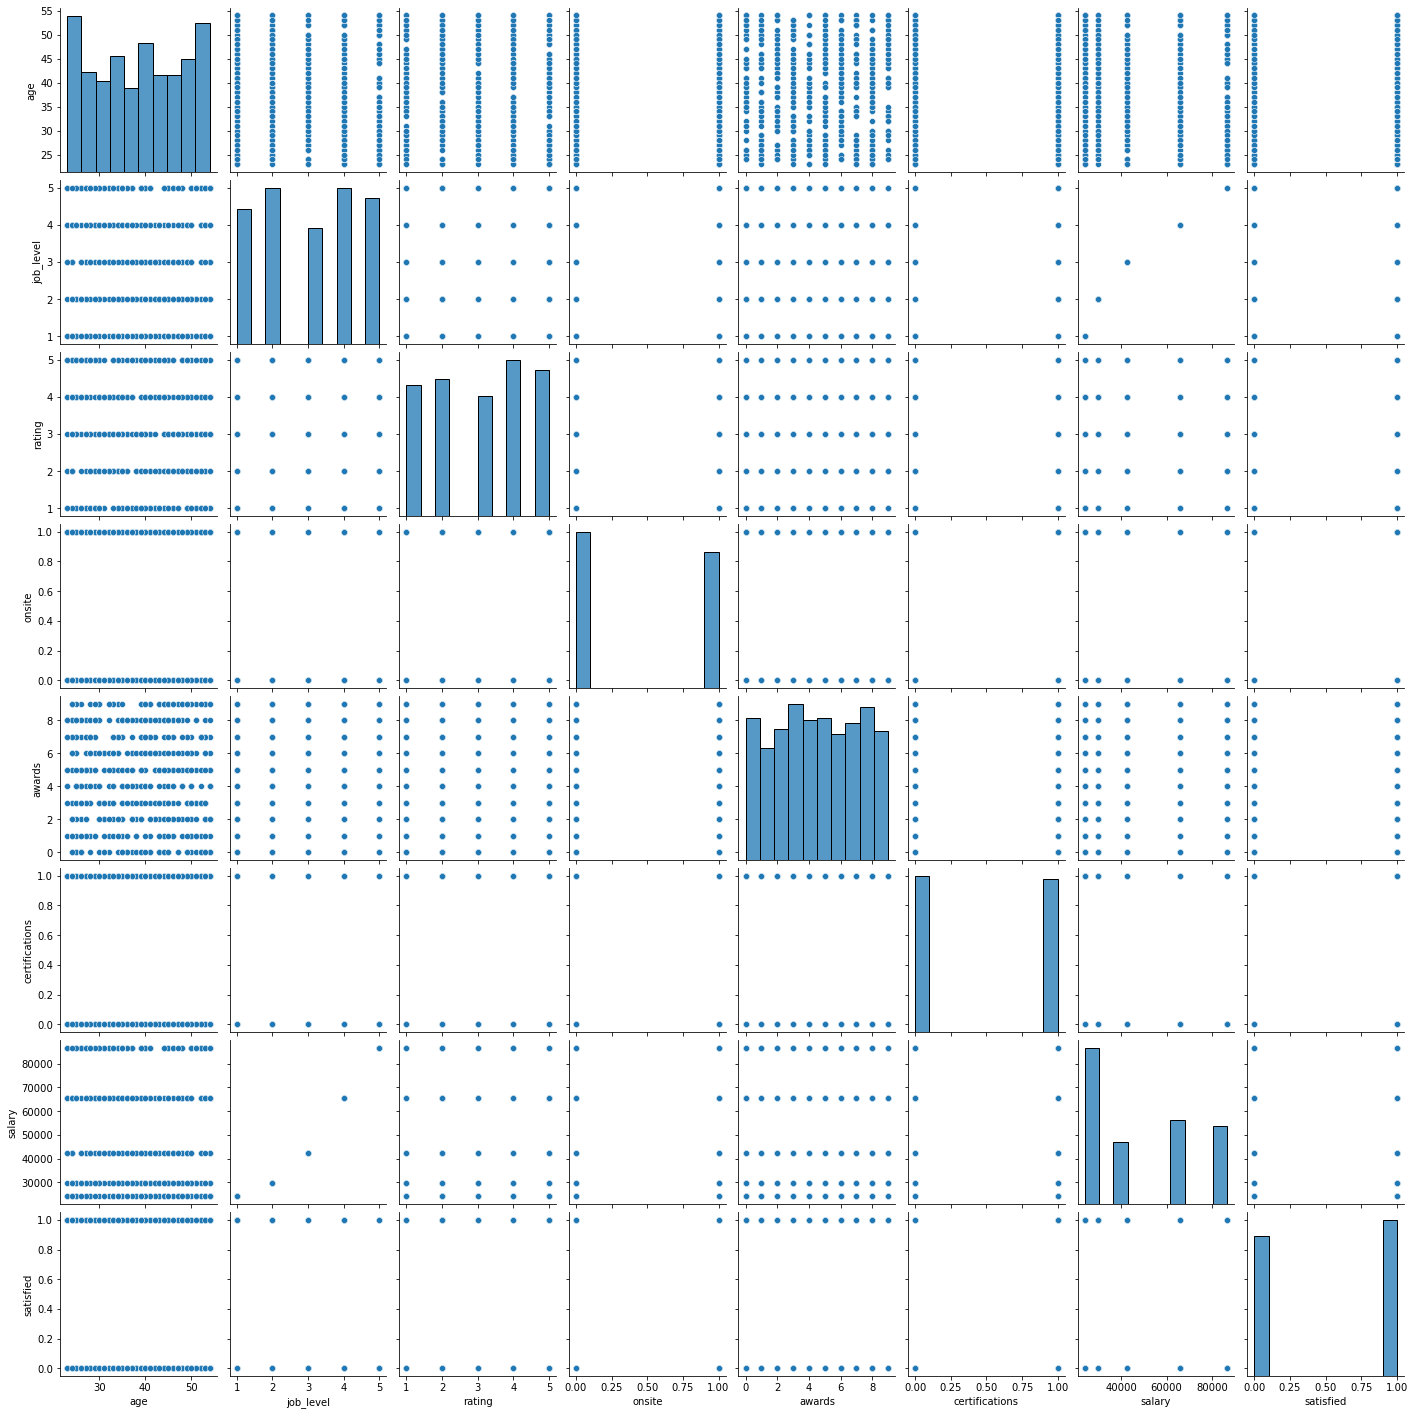

In [103]:
sns.pairplot(df)

C:\Users\ysavi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

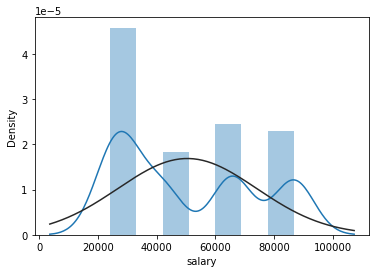

In [104]:
sns.distplot(df['salary'],fit = norm)

<AxesSubplot:>

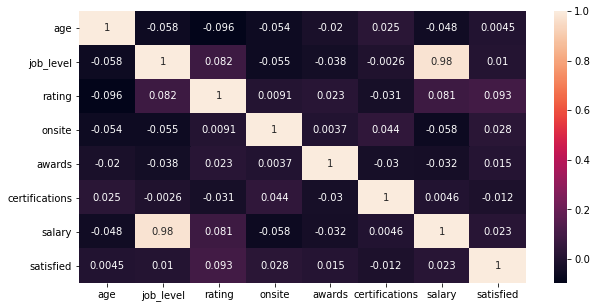

In [105]:
plt.figure(1,figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

Here strong correlation between salary and job_level is 0.98

In [106]:
df1 = df
df1.drop(['job_level'], axis=1, inplace = True)
print(df1.head())
print(df1.shape)

   age        Dept location education    recruitment_type  rating  onsite  \
0   28          HR   Suburb        PG            Referral       2       0   
1   50  Technology   Suburb        PG             Walk-in       5       1   
2   43  Technology   Suburb        UG            Referral       1       0   
3   44       Sales     City        PG           On-Campus       3       1   
4   33          HR     City        UG  Recruitment Agency       1       0   

   awards  certifications  salary  satisfied  
0       1               0   86750          1  
1       2               1   42419          0  
2       2               0   65715          0  
3       0               0   29805          1  
4       5               0   29805          1  
(500, 11)


In [107]:
df.location = df.location.astype('category')
df.Dept = df.Dept.astype('category')
df.recruitment_type =  df.recruitment_type.astype('category')
df.education = df.education.astype('category')


location_d = dict(enumerate(df.location.cat.categories))
Dept_d = dict(enumerate(df.Dept.cat.categories))
recruitment_type_d = dict(enumerate(df.recruitment_type.cat.categories))
education_d = dict(enumerate(df.education.cat.categories))


df.location = df.location.cat.codes
df.Dept = df.Dept.cat.codes
df.recruitment_type = df.recruitment_type.cat.codes
df.education = df.education.cat.codes

In [108]:
print(df.shape)
print(df.head())
print(df.info())

(500, 11)
   age  Dept  location  education  recruitment_type  rating  onsite  awards  \
0   28     0         1          0                 2       2       0       1   
1   50     4         1          0                 3       5       1       2   
2   43     4         1          1                 2       1       0       2   
3   44     3         0          0                 0       3       1       0   
4   33     0         0          1                 1       1       0       5   

   certifications  salary  satisfied  
0               0   86750          1  
1               1   42419          0  
2               0   65715          0  
3               0   29805          1  
4               0   29805          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               500 non-null    int64
 1   Dept              500 non-null    in

## Train\test split

In [109]:
X=df.iloc[:,0:10]
y=df.iloc[:,10]

In [110]:
X.shape

(500, 10)

In [111]:
y.shape

(500,)

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Hyper parameter tuning for XGBoost

In [113]:
X.head()

,age,Dept,location,education,recruitment_type,rating,onsite,awards,certifications,salary
0,28,0,1,0,2,2,0,1,0,86750
1,50,4,1,0,3,5,1,2,1,42419
2,43,4,1,1,2,1,0,2,0,65715
3,44,3,0,0,0,3,1,0,0,29805
4,33,0,0,1,1,1,0,5,0,29805


In [114]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: satisfied, dtype: int64

In [115]:
## Hyper Parameter tuning for xgboost
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
    

In [116]:
params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
            'max_depth': [3, 5, 7, 10, 12, 15],
            'min_child_weight': [1, 3, 5, 7],
            'gamma' : [0.1, 0,2, 0.3, 0.4],
            'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                }

In [117]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n time taken: %i hour %i minutes and %s seconds.' % (thour,tmin, round(tsec,2)))
    

In [118]:
classifier= xgboost.XGBClassifier()

In [119]:
random_search=RandomizedSearchCV(classifier, param_distributions = params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [120]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[12:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 time taken: 0 hour 0 minutes and 3.35 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished
C:\Users\ysavi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [121]:
X.head()

,age,Dept,location,education,recruitment_type,rating,onsite,awards,certifications,salary
0,28,0,1,0,2,2,0,1,0,86750
1,50,4,1,0,3,5,1,2,1,42419
2,43,4,1,1,2,1,0,2,0,65715
3,44,3,0,0,0,3,1,0,0,29805
4,33,0,0,1,1,1,0,5,0,29805


In [122]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [123]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [124]:

classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [125]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10)

C:\Users\ysavi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [126]:
score

array([0.52, 0.4 , 0.5 , 0.46, 0.58, 0.52, 0.48, 0.54, 0.56, 0.58])

In [127]:
score.mean()

0.514

## Implement K-means

In [128]:
# preprocessing
X = df.drop(['satisfied'],axis=1)
y = df.satisfied

In [129]:
X.shape

(500, 10)

In [130]:
y.shape

(500,)

In [131]:
print(f'Shape of X_test is: ',X_test.shape)
print(f'Shape of X_train is: ',X_train.shape)
print(f'Shape of y_test is: ',y_test.shape)
print(f'Shape of y_train is: ',y_train.shape)

Shape of X_test is:  (100, 10)
Shape of X_train is:  (400, 10)
Shape of y_test is:  (100,)
Shape of y_train is:  (400,)


In [132]:
# Feature scaling
from sklearn.preprocessing import StandardScaler, normalize

In [133]:
# X = StandardScaler().fit_transform(X)
# # y = StandardScaler().fit_transform(y)
#df = df.drop(['satisfied'],axis=1)
# df.head()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               500 non-null    int64
 1   Dept              500 non-null    int8 
 2   location          500 non-null    int8 
 3   education         500 non-null    int8 
 4   recruitment_type  500 non-null    int8 
 5   rating            500 non-null    int64
 6   onsite            500 non-null    int64
 7   awards            500 non-null    int64
 8   certifications    500 non-null    int64
 9   salary            500 non-null    int64
 10  satisfied         500 non-null    int64
dtypes: int64(7), int8(4)
memory usage: 29.4 KB


In [135]:
# Standardize data
scaler = pp.StandardScaler() 
df_scaled = scaler.fit_transform(df) 
# Normalizing the Data 
# normalized_df = pp.normalize(df_scaled) 
  
# # Converting the numpy array into a pandas DataFrame 
# normalized_df = pd.DataFrame(normalized_df) 

# normalized_df.describe()  

# scaler = StandardScaler()

In [136]:
columns = ['age','Dept','location','education','recruitment_type','rating','onsite','awards','certifications','salary',
           'satisfied']

In [137]:
df.columns = [x.strip(" (cm)") for x in df.columns]

In [138]:
for col in df.columns:
    avg=df[col].mean()
    sd=df[col].std()
    df[col]=df[col].apply(lambda x: (x-avg)/sd)

In [139]:
df.head()

,age,Dept,location,education,recruitment_type,rating,onsite,awards,ertifications,salary,satisfied
0,-1.124102,-1.384380,1.035635,-0.983141,0.432090,-0.752234,-0.933228,-1.240005,-0.991039,1.534931,0.948335
1,1.206741,1.438005,1.035635,-0.983141,1.310321,1.352898,1.069407,-0.889523,1.007024,-0.337836,-1.052371
2,0.465109,1.438005,1.035635,1.015113,0.432090,-1.453945,-0.933228,-0.889523,-0.991039,0.646305,-1.052371
3,0.571056,0.732409,-0.963660,-0.983141,-1.324373,-0.050523,1.069407,-1.590486,-0.991039,-0.870716,0.948335
4,-0.594365,-1.384380,-0.963660,1.015113,-0.446141,-1.453945,-0.933228,0.161923,-0.991039,-0.870716,0.948335


In [140]:
df_scaled.view()

array([[-1.12522746, -1.38576602,  1.03667198, ..., -0.99203175,
         1.5364678 ,  0.9492843 ],
       [ 1.20794918,  1.43944502,  1.03667198, ...,  1.00803226,
        -0.33817466, -1.05342519],
       [ 0.46557479,  1.43944502,  1.03667198, ..., -0.99203175,
         0.64695247, -1.05342519],
       ...,
       [-0.48890656, -0.67946326, -0.96462528, ..., -0.99203175,
        -1.11385232,  0.9492843 ],
       [-1.33733443,  1.43944502, -0.96462528, ...,  1.00803226,
        -0.87158784, -1.05342519],
       [-1.33733443,  1.43944502, -0.96462528, ..., -0.99203175,
        -0.33817466, -1.05342519]])

In [141]:
# K Mean Clustring
# kmeans = KMeans(2,random_state=6)
# kmeans.fit(df_scaled)
# labels = kmeans.labels_

In [215]:
kmeans = KMeans(n_clusters=2)
df['clusters'] = kmeans.fit_predict(df)
# kmeans.cluster_centers_.shape

In [216]:
df.head()

,age,Dept,location,education,recruitment_type,rating,onsite,awards,ertifications,salary,satisfied,clusters
0,-1.124102,-1.384380,1.035635,-0.983141,0.432090,-0.752234,-0.933228,-1.240005,-0.991039,1.534931,0.948335,1
1,1.206741,1.438005,1.035635,-0.983141,1.310321,1.352898,1.069407,-0.889523,1.007024,-0.337836,-1.052371,0
2,0.465109,1.438005,1.035635,1.015113,0.432090,-1.453945,-0.933228,-0.889523,-0.991039,0.646305,-1.052371,0
3,0.571056,0.732409,-0.963660,-0.983141,-1.324373,-0.050523,1.069407,-1.590486,-0.991039,-0.870716,0.948335,0
4,-0.594365,-1.384380,-0.963660,1.015113,-0.446141,-1.453945,-0.933228,0.161923,-0.991039,-0.870716,0.948335,0


In [217]:
y_train

107    1
336    0
71     0
474    1
6      0
      ..
323    0
192    1
117    0
47     0
172    0
Name: satisfied, Length: 400, dtype: int64

In [218]:
y_test

90     0
254    0
283    0
445    1
461    1
      ..
372    0
56     1
440    0
60     1
208    0
Name: satisfied, Length: 100, dtype: int64

In [219]:
X_train

,age,Dept,location,education,recruitment_type,rating,onsite,awards,certifications,salary
107,52,2,1,0,2,3,1,7,0,65715
336,30,0,0,1,2,2,0,9,0,86750
71,24,0,0,1,1,5,1,3,1,65715
474,44,1,0,1,1,5,0,5,0,29805
6,26,2,1,1,2,5,0,2,0,86750
...,...,...,...,...,...,...,...,...,...,...
323,29,4,1,0,2,2,1,4,0,24076
192,30,3,0,0,1,3,0,9,0,29805
117,45,4,1,1,0,3,0,4,0,86750
47,46,0,1,1,2,2,0,1,0,42419


In [220]:
X_test

,age,Dept,location,education,recruitment_type,rating,onsite,awards,certifications,salary
90,35,2,1,0,3,3,0,2,0,65715
254,43,3,1,0,0,4,0,1,0,29805
283,49,1,1,1,3,1,1,1,0,24076
445,53,1,1,0,2,5,0,6,1,65715
461,33,3,0,0,0,3,1,6,0,24076
...,...,...,...,...,...,...,...,...,...,...
372,28,1,1,1,1,1,0,4,1,86750
56,40,2,1,1,0,5,1,6,1,65715
440,43,1,1,0,2,4,0,3,1,29805
60,37,1,1,0,1,4,1,7,0,86750


In [221]:
df.clusters.value_counts()

0    266
1    234
Name: clusters, dtype: int64

In [222]:
kmeans.fit_predict(X_train)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [223]:
kmeans.fit_predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [224]:
kmeans = KMeans(n_clusters=4)
df['clusters'] = kmeans.fit_predict(df)

In [225]:
df.head()

,age,Dept,location,education,recruitment_type,rating,onsite,awards,ertifications,salary,satisfied,clusters
0,-1.124102,-1.384380,1.035635,-0.983141,0.432090,-0.752234,-0.933228,-1.240005,-0.991039,1.534931,0.948335,0
1,1.206741,1.438005,1.035635,-0.983141,1.310321,1.352898,1.069407,-0.889523,1.007024,-0.337836,-1.052371,2
2,0.465109,1.438005,1.035635,1.015113,0.432090,-1.453945,-0.933228,-0.889523,-0.991039,0.646305,-1.052371,2
3,0.571056,0.732409,-0.963660,-0.983141,-1.324373,-0.050523,1.069407,-1.590486,-0.991039,-0.870716,0.948335,1
4,-0.594365,-1.384380,-0.963660,1.015113,-0.446141,-1.453945,-0.933228,0.161923,-0.991039,-0.870716,0.948335,3


In [226]:
y_train

107    1
336    0
71     0
474    1
6      0
      ..
323    0
192    1
117    0
47     0
172    0
Name: satisfied, Length: 400, dtype: int64

In [227]:
y_test

90     0
254    0
283    0
445    1
461    1
      ..
372    0
56     1
440    0
60     1
208    0
Name: satisfied, Length: 100, dtype: int64

In [228]:
X_train

,age,Dept,location,education,recruitment_type,rating,onsite,awards,certifications,salary
107,52,2,1,0,2,3,1,7,0,65715
336,30,0,0,1,2,2,0,9,0,86750
71,24,0,0,1,1,5,1,3,1,65715
474,44,1,0,1,1,5,0,5,0,29805
6,26,2,1,1,2,5,0,2,0,86750
...,...,...,...,...,...,...,...,...,...,...
323,29,4,1,0,2,2,1,4,0,24076
192,30,3,0,0,1,3,0,9,0,29805
117,45,4,1,1,0,3,0,4,0,86750
47,46,0,1,1,2,2,0,1,0,42419


In [229]:
X_test

,age,Dept,location,education,recruitment_type,rating,onsite,awards,certifications,salary
90,35,2,1,0,3,3,0,2,0,65715
254,43,3,1,0,0,4,0,1,0,29805
283,49,1,1,1,3,1,1,1,0,24076
445,53,1,1,0,2,5,0,6,1,65715
461,33,3,0,0,0,3,1,6,0,24076
...,...,...,...,...,...,...,...,...,...,...
372,28,1,1,1,1,1,0,4,1,86750
56,40,2,1,1,0,5,1,6,1,65715
440,43,1,1,0,2,4,0,3,1,29805
60,37,1,1,0,1,4,1,7,0,86750


In [230]:
df.clusters.value_counts()

3    139
0    123
1    120
2    118
Name: clusters, dtype: int64

In [231]:
kmeans.fit_predict(X_train)

array([2, 1, 2, 3, 1, 1, 3, 0, 3, 3, 0, 3, 1, 0, 3, 0, 3, 2, 3, 3, 3, 3,
       3, 1, 2, 0, 1, 3, 2, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 0, 1, 0, 1, 2,
       0, 3, 0, 1, 2, 0, 2, 3, 3, 1, 0, 2, 0, 3, 2, 1, 1, 2, 3, 2, 1, 3,
       2, 1, 0, 1, 3, 3, 1, 2, 3, 0, 2, 3, 2, 0, 3, 0, 2, 2, 1, 2, 2, 3,
       3, 1, 2, 0, 3, 3, 3, 3, 0, 2, 3, 0, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3,
       0, 3, 2, 2, 2, 1, 2, 3, 0, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1,
       2, 3, 1, 2, 2, 3, 2, 3, 1, 0, 2, 1, 3, 2, 0, 3, 0, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 0, 1, 2, 3, 3, 3, 3, 0, 2, 1, 3, 0, 2, 0, 3, 3,
       3, 2, 2, 1, 3, 1, 1, 2, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 3, 2, 2, 3,
       0, 1, 3, 3, 0, 0, 2, 0, 3, 3, 3, 3, 1, 2, 1, 1, 3, 3, 1, 3, 0, 3,
       1, 1, 3, 3, 2, 0, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 1, 3, 2,
       1, 3, 3, 3, 1, 0, 2, 2, 3, 2, 2, 3, 3, 2, 1, 3, 3, 1, 3, 2, 2, 1,
       1, 1, 2, 3, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 3, 1, 3, 3, 2, 3, 2,
       2, 0, 0, 3, 0, 1, 3, 3, 2, 3, 1, 3, 1, 3, 3,

In [232]:
kmeans.fit_predict(X_test)

array([2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2,
       3, 3, 1, 0, 1, 3, 2, 1, 0, 0, 0, 3, 3, 3, 3, 0, 2, 2, 1, 2, 0, 3,
       0, 3, 3, 3, 0, 1, 0, 1, 3, 2, 3, 3, 3, 0, 0, 0, 2, 0, 1, 3, 3, 3,
       2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 3, 0, 0, 2, 2, 0, 1, 2, 3, 0,
       0, 2, 0, 0, 3, 0, 0, 1, 2, 0, 1, 1])

In [233]:
kmeans = KMeans(n_clusters=8)
df['clusters'] = kmeans.fit_predict(df)

In [234]:
df.head()

,age,Dept,location,education,recruitment_type,rating,onsite,awards,ertifications,salary,satisfied,clusters
0,-1.124102,-1.384380,1.035635,-0.983141,0.432090,-0.752234,-0.933228,-1.240005,-0.991039,1.534931,0.948335,4
1,1.206741,1.438005,1.035635,-0.983141,1.310321,1.352898,1.069407,-0.889523,1.007024,-0.337836,-1.052371,1
2,0.465109,1.438005,1.035635,1.015113,0.432090,-1.453945,-0.933228,-0.889523,-0.991039,0.646305,-1.052371,3
3,0.571056,0.732409,-0.963660,-0.983141,-1.324373,-0.050523,1.069407,-1.590486,-0.991039,-0.870716,0.948335,2
4,-0.594365,-1.384380,-0.963660,1.015113,-0.446141,-1.453945,-0.933228,0.161923,-0.991039,-0.870716,0.948335,6


In [235]:
y_train

107    1
336    0
71     0
474    1
6      0
      ..
323    0
192    1
117    0
47     0
172    0
Name: satisfied, Length: 400, dtype: int64

In [236]:
y_test

90     0
254    0
283    0
445    1
461    1
      ..
372    0
56     1
440    0
60     1
208    0
Name: satisfied, Length: 100, dtype: int64

In [237]:
X_test

,age,Dept,location,education,recruitment_type,rating,onsite,awards,certifications,salary
90,35,2,1,0,3,3,0,2,0,65715
254,43,3,1,0,0,4,0,1,0,29805
283,49,1,1,1,3,1,1,1,0,24076
445,53,1,1,0,2,5,0,6,1,65715
461,33,3,0,0,0,3,1,6,0,24076
...,...,...,...,...,...,...,...,...,...,...
372,28,1,1,1,1,1,0,4,1,86750
56,40,2,1,1,0,5,1,6,1,65715
440,43,1,1,0,2,4,0,3,1,29805
60,37,1,1,0,1,4,1,7,0,86750


In [238]:
X_train

,age,Dept,location,education,recruitment_type,rating,onsite,awards,certifications,salary
107,52,2,1,0,2,3,1,7,0,65715
336,30,0,0,1,2,2,0,9,0,86750
71,24,0,0,1,1,5,1,3,1,65715
474,44,1,0,1,1,5,0,5,0,29805
6,26,2,1,1,2,5,0,2,0,86750
...,...,...,...,...,...,...,...,...,...,...
323,29,4,1,0,2,2,1,4,0,24076
192,30,3,0,0,1,3,0,9,0,29805
117,45,4,1,1,0,3,0,4,0,86750
47,46,0,1,1,2,2,0,1,0,42419


In [239]:
df.clusters.value_counts()

6    92
4    76
2    70
3    67
0    50
5    49
1    49
7    47
Name: clusters, dtype: int64

In [243]:
kmeans.fit_predict(X_train)

array([1, 2, 7, 4, 2, 2, 5, 3, 5, 4, 3, 5, 2, 3, 5, 3, 6, 7, 5, 4, 4, 6,
       4, 2, 1, 3, 2, 6, 1, 4, 2, 5, 2, 4, 0, 1, 4, 5, 4, 3, 2, 3, 2, 1,
       3, 6, 3, 2, 1, 3, 7, 4, 5, 2, 3, 7, 3, 6, 7, 2, 2, 1, 5, 7, 2, 6,
       1, 2, 3, 2, 6, 5, 2, 7, 6, 3, 7, 5, 7, 3, 5, 3, 1, 7, 2, 7, 7, 4,
       4, 2, 1, 3, 0, 6, 5, 6, 3, 1, 0, 3, 4, 4, 5, 1, 0, 2, 7, 5, 4, 0,
       3, 6, 1, 1, 1, 2, 7, 4, 3, 6, 0, 2, 7, 0, 1, 6, 6, 0, 6, 0, 4, 2,
       1, 6, 2, 7, 7, 6, 7, 6, 2, 3, 7, 2, 5, 7, 3, 4, 3, 1, 5, 5, 4, 6,
       0, 4, 0, 5, 2, 4, 3, 2, 1, 4, 5, 5, 4, 3, 7, 2, 4, 3, 7, 3, 5, 5,
       0, 7, 1, 2, 4, 2, 2, 7, 6, 7, 3, 5, 7, 3, 6, 1, 4, 7, 4, 7, 7, 4,
       3, 2, 4, 4, 3, 3, 7, 3, 4, 6, 6, 5, 2, 1, 2, 2, 5, 4, 2, 5, 3, 4,
       2, 2, 5, 4, 1, 3, 2, 2, 6, 5, 7, 2, 5, 4, 5, 5, 1, 4, 7, 2, 0, 1,
       2, 4, 4, 5, 2, 3, 7, 1, 4, 1, 1, 6, 4, 7, 2, 4, 6, 2, 5, 1, 1, 2,
       2, 2, 1, 4, 2, 1, 2, 3, 2, 2, 2, 2, 3, 3, 2, 4, 2, 0, 4, 1, 5, 1,
       1, 3, 3, 5, 3, 2, 0, 4, 7, 4, 2, 6, 2, 4, 5,

In [241]:
kmeans.fit_predict(X_test)

array([1, 7, 0, 5, 6, 2, 2, 4, 4, 4, 2, 1, 0, 2, 2, 0, 6, 0, 0, 1, 2, 5,
       3, 3, 2, 6, 2, 3, 1, 2, 4, 6, 0, 3, 3, 3, 3, 4, 5, 1, 2, 1, 0, 3,
       6, 3, 3, 3, 0, 2, 7, 2, 3, 5, 3, 3, 3, 4, 4, 6, 5, 6, 2, 3, 3, 3,
       1, 0, 0, 2, 1, 1, 2, 4, 4, 1, 1, 2, 3, 7, 4, 5, 1, 7, 2, 1, 3, 4,
       7, 1, 6, 0, 3, 0, 6, 2, 1, 7, 2, 2])

In [145]:
# Elbow chart
# figure = plt.figure(figsize=(15, 10))
# elbow = figure.add_subplot(1,2,1) 
# n_clusters=10
# wcss=[]
# for i in range(1,n_clusters):
#     kmean= KMeans(i)
#     kmean.fit(df_scaled)
#     wcss.append(kmean.inertia_) 
#     elbow.set_ylabel('Sum of Squared Errors', fontsize = 10)
#     elbow.set_xlabel('Number of Clusters', fontsize = 10)
#     elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
#     elbow.plot(wcss, 'bx-')


In [146]:
print("k-means lables"+ str(kmeans.labels_))

k-means lables[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0
 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0
 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0
 1 0 1 0 1 

In [148]:
y_train

107    1
336    0
71     0
474    1
6      0
      ..
323    0
192    1
117    0
47     0
172    0
Name: satisfied, Length: 400, dtype: int64

In [149]:
df_scaled

array([[-1.12522746, -1.38576602,  1.03667198, ..., -0.99203175,
         1.5364678 ,  0.9492843 ],
       [ 1.20794918,  1.43944502,  1.03667198, ...,  1.00803226,
        -0.33817466, -1.05342519],
       [ 0.46557479,  1.43944502,  1.03667198, ..., -0.99203175,
         0.64695247, -1.05342519],
       ...,
       [-0.48890656, -0.67946326, -0.96462528, ..., -0.99203175,
        -1.11385232,  0.9492843 ],
       [-1.33733443,  1.43944502, -0.96462528, ...,  1.00803226,
        -0.87158784, -1.05342519],
       [-1.33733443,  1.43944502, -0.96462528, ..., -0.99203175,
        -0.33817466, -1.05342519]])

In [150]:
kmeans.cluster_centers_

array([[3.93157895e+01, 1.98245614e+00, 4.95614035e-01, 4.78070175e-01,
        1.42543860e+00, 2.91666667e+00, 4.60526316e-01, 4.64912281e+00,
        5.13157895e-01, 3.13203860e+04],
       [3.83779070e+01, 1.92441860e+00, 4.70930233e-01, 5.17441860e-01,
        1.63372093e+00, 3.16860465e+00, 4.30232558e-01, 4.51744186e+00,
        4.88372093e-01, 7.58656105e+04]])

In [151]:
kmeans.cluster_centers_.shape

(2, 10)

In [152]:
kmeans.fit(X_test,y_test)

KMeans(n_clusters=2)

In [153]:
kmeans.fit(X_train,y_train)

KMeans(n_clusters=2)

In [154]:
np.sum(y_test)

55

In [155]:
y_pred = kmeans.predict(X_test)
np.sum(y_pred)

59

### Confusion Matrix

In [156]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[18, 27],
       [23, 32]], dtype=int64)

In [157]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))
print("Precision", metrics.precision_score(y_test,y_pred))
print("Recall", metrics.recall_score(y_test,y_pred))

Accuracy 0.5
Precision 0.5423728813559322
Recall 0.5818181818181818


In [158]:
df.head()

,age,Dept,location,education,recruitment_type,rating,onsite,awards,ertifications,salary,satisfied,clusters
0,-1.124102,-1.384380,1.035635,-0.983141,0.432090,-0.752234,-0.933228,-1.240005,-0.991039,1.534931,0.948335,0
1,1.206741,1.438005,1.035635,-0.983141,1.310321,1.352898,1.069407,-0.889523,1.007024,-0.337836,-1.052371,0
2,0.465109,1.438005,1.035635,1.015113,0.432090,-1.453945,-0.933228,-0.889523,-0.991039,0.646305,-1.052371,0
3,0.571056,0.732409,-0.963660,-0.983141,-1.324373,-0.050523,1.069407,-1.590486,-0.991039,-0.870716,0.948335,1
4,-0.594365,-1.384380,-0.963660,1.015113,-0.446141,-1.453945,-0.933228,0.161923,-0.991039,-0.870716,0.948335,1


## Decisin Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier 

In [160]:
DT = DecisionTreeClassifier()

In [161]:
# Train Decision Tree Classifer
DT = DT.fit(X_train,y_train)

In [162]:
#Predict the response for test dataset
y_pred = DT.predict(X_test)

In [163]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test,y_pred))
print("Recall", metrics.recall_score(y_test,y_pred))

Accuracy: 0.56
Precision 0.6037735849056604
Recall 0.5818181818181818


### Optimizing Decision Tree Performance

In [164]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
DT = DT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DT.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test,y_pred))
print("Recall", metrics.recall_score(y_test,y_pred))

Accuracy: 0.59
Precision 0.6129032258064516
Recall 0.6909090909090909


## SVM

In [165]:
from sklearn import svm

In [166]:
X=df.iloc[:,0:10]
y=df.iloc[:,10]

In [167]:
X.shape

(500, 10)

In [168]:
y.shape

(500,)

In [169]:
# create a svm classfier
clf=svm.SVC(kernel="poly",degree=10)

In [170]:
clf.fit(X_train,y_train)

SVC(degree=10, kernel='poly')

In [171]:
# Predict the responce for the test dataset
y_pred = clf.predict(X_test)

In [172]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test,y_pred))
print("Recall", metrics.recall_score(y_test,y_pred))

Accuracy: 0.55
Precision 0.55
Recall 1.0
